In [22]:
from tempfile import TemporaryDirectory
import matplotlib.pyplot as plt
import suite2p


# Running suite2p on example data

## Set pipeline parameters


In [17]:
ops = suite2p.default_ops()
print(ops)

{'look_one_level_down': False, 'fast_disk': [], 'delete_bin': False, 'mesoscan': False, 'bruker': False, 'h5py': [], 'h5py_key': 'data', 'save_path0': [], 'save_folder': [], 'subfolders': [], 'move_bin': False, 'nplanes': 1, 'nchannels': 1, 'functional_chan': 1, 'tau': 1.0, 'fs': 10.0, 'force_sktiff': False, 'frames_include': -1, 'multiplane_parallel': False, 'preclassify': 0.0, 'save_mat': False, 'save_NWB': False, 'combined': True, 'aspect': 1.0, 'do_bidiphase': False, 'bidiphase': 0, 'bidi_corrected': False, 'do_registration': 1, 'two_step_registration': False, 'keep_movie_raw': False, 'nimg_init': 300, 'batch_size': 500, 'maxregshift': 0.1, 'align_by_chan': 1, 'reg_tif': False, 'reg_tif_chan2': False, 'subpixel': 10, 'smooth_sigma_time': 0, 'smooth_sigma': 1.15, 'th_badframes': 1.0, 'pad_fft': False, 'nonrigid': True, 'block_size': [128, 128], 'snr_thresh': 1.2, 'maxregshiftNR': 5, '1Preg': False, 'spatial_hp': 25, 'spatial_hp_reg': 26, 'spatial_hp_detect': 25, 'pre_smooth': 2, 'sp

## Set Data Path
`Ops` and `db` are functionally equivalent internally in suite2p. 

**Important**: Parmeters provided in `db` will overwrite parameters specified in `ops`. Since it's common to change datasets and keep the same parameters for each dataset, it can be useful to specify data-related arguments in `db` and pipeline parameters in `ops`. 

In [19]:
db = {
    'data_path': ['../data/test_data'],
    'save_path0': TemporaryDirectory().name,
    'tiff_list': ['input_1500.tif'],
}
db

{'data_path': ['../data/test_data'],
 'save_path0': 'D:\\Temp\\tmpk2xhgfxd',
 'tiff_list': ['input_1500.tif']}

## Run Suite2p on Data

The `suite2p.run_s2p` function runs the pipeline and returns a list of output dictionaries containing the pipeline parameters used and extra data calculated along the way, one for each plane.

In [23]:
output_ops = suite2p.run_s2p(ops=ops, db=db)

{'data_path': ['../data/test_data'], 'save_path0': 'D:\\Temp\\tmpk2xhgfxd', 'tiff_list': ['input_1500.tif']}
FOUND BINARIES AND OPS IN ['D:\\Temp\\tmpk2xhgfxd\\suite2p\\plane0\\ops.npy']
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not running registration, plane already registered
----------- ROI DETECTION
Binning movie in chunks of length 10
Binned movie [150,252,254], 0.76 sec.
NOTE: estimated spatial scale ~12 pixels, time epochs 1.00, threshold 10.00 
0 ROIs, score=85.03
Found 300 ROIs, 4.04 sec
After removing overlaps, 296 ROIs remain
Masks made in 4.96 sec.
----------- Total 9.92 sec.
----------- EXTRACTION
Extracted fluorescence from 296 ROIs in 1500 frames, 1.84 sec.
added enhanced mean image
----------- Total 4.00 sec.
----------- CLASSIFICATION
NOTE: applying default $HOME/.suite2p/classifiers/classifier_user.npy
----------- Total 0.03 sec.
----------- SPIKE DECONVOLUTION
----------- Total 0.05 sec.
Plane 0 processed in 14.03 sec (can open in GUI).
total = 14.1

In [24]:
output_op = output_ops[0]
print(output_op.keys())

dict_keys(['look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'bruker', 'h5py', 'h5py_key', 'save_path0', 'save_folder', 'subfolders', 'move_bin', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'frames_include', 'multiplane_parallel', 'preclassify', 'save_mat', 'save_NWB', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'bidi_corrected', 'do_registration', 'two_step_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma_time', 'smooth_sigma', 'th_badframes', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp', 'spatial_hp_reg', 'spatial_hp_detect', 'pre_smooth', 'spatial_taper', 'roidetect', 'spikedetect', 'sparse_mode', 'diameter', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap', 'high_pass', 'inner_neuropil_radius', 'min_neuropil_pixels', 'allow_overlap', 'chan2_thres', 'ba

## Visualizations

### Registration

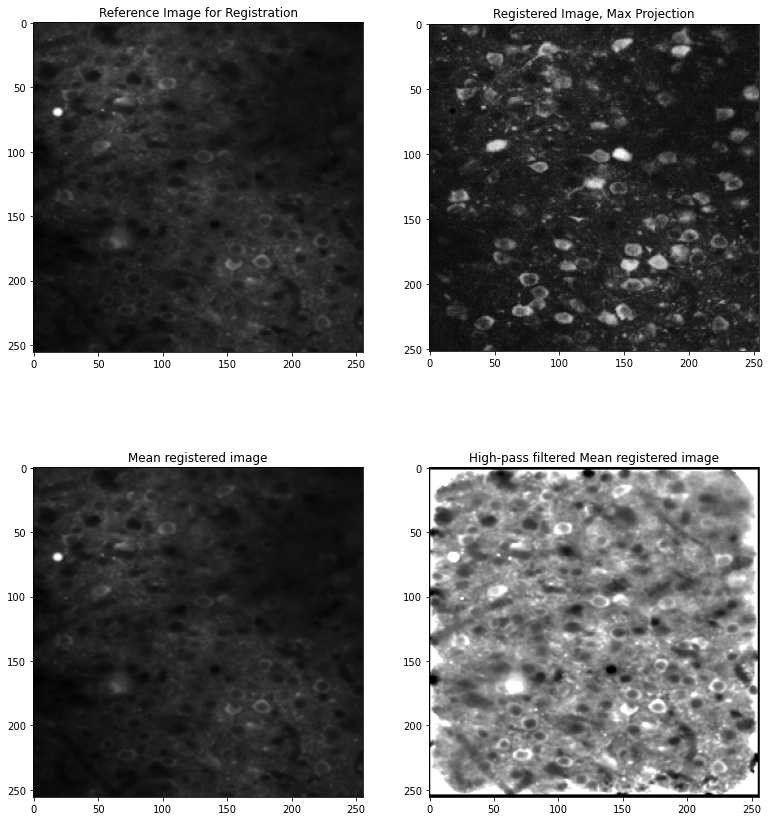

In [45]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(13, 15));
ax1.imshow(output_op['refImg'], cmap='gray')
ax1.set(
    title="Reference Image for Registration",
);
ax2.imshow(output_op['max_proj'], cmap='gray')
ax2.set(
    title="Registered Image, Max Projection",
);
ax3.imshow(output_op['meanImg'], cmap='gray')
ax3.set(
    title="Mean registered image",
);
ax4.imshow(output_op['meanImgE'], cmap='gray')
ax4.set(
    title="High-pass filtered Mean registered image",
);


### Detection


In [40]:
print(output_op.keys())

dict_keys(['look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'bruker', 'h5py', 'h5py_key', 'save_path0', 'save_folder', 'subfolders', 'move_bin', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'frames_include', 'multiplane_parallel', 'preclassify', 'save_mat', 'save_NWB', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'bidi_corrected', 'do_registration', 'two_step_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma_time', 'smooth_sigma', 'th_badframes', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp', 'spatial_hp_reg', 'spatial_hp_detect', 'pre_smooth', 'spatial_taper', 'roidetect', 'spikedetect', 'sparse_mode', 'diameter', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap', 'high_pass', 'inner_neuropil_radius', 'min_neuropil_pixels', 'allow_overlap', 'chan2_thres', 'ba